**1.Import libararies and dataset**

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
data=pd.read_csv("/content/Employee.csv")

**2.Data understanding**

In [203]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [204]:
data.shape

(74498, 24)

In [205]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [206]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

**3.Data cleaning**

In [208]:
#Dropping the column 'Employee ID' here as the column is irrelevant.
data.drop('Employee ID', axis=1, inplace=True)

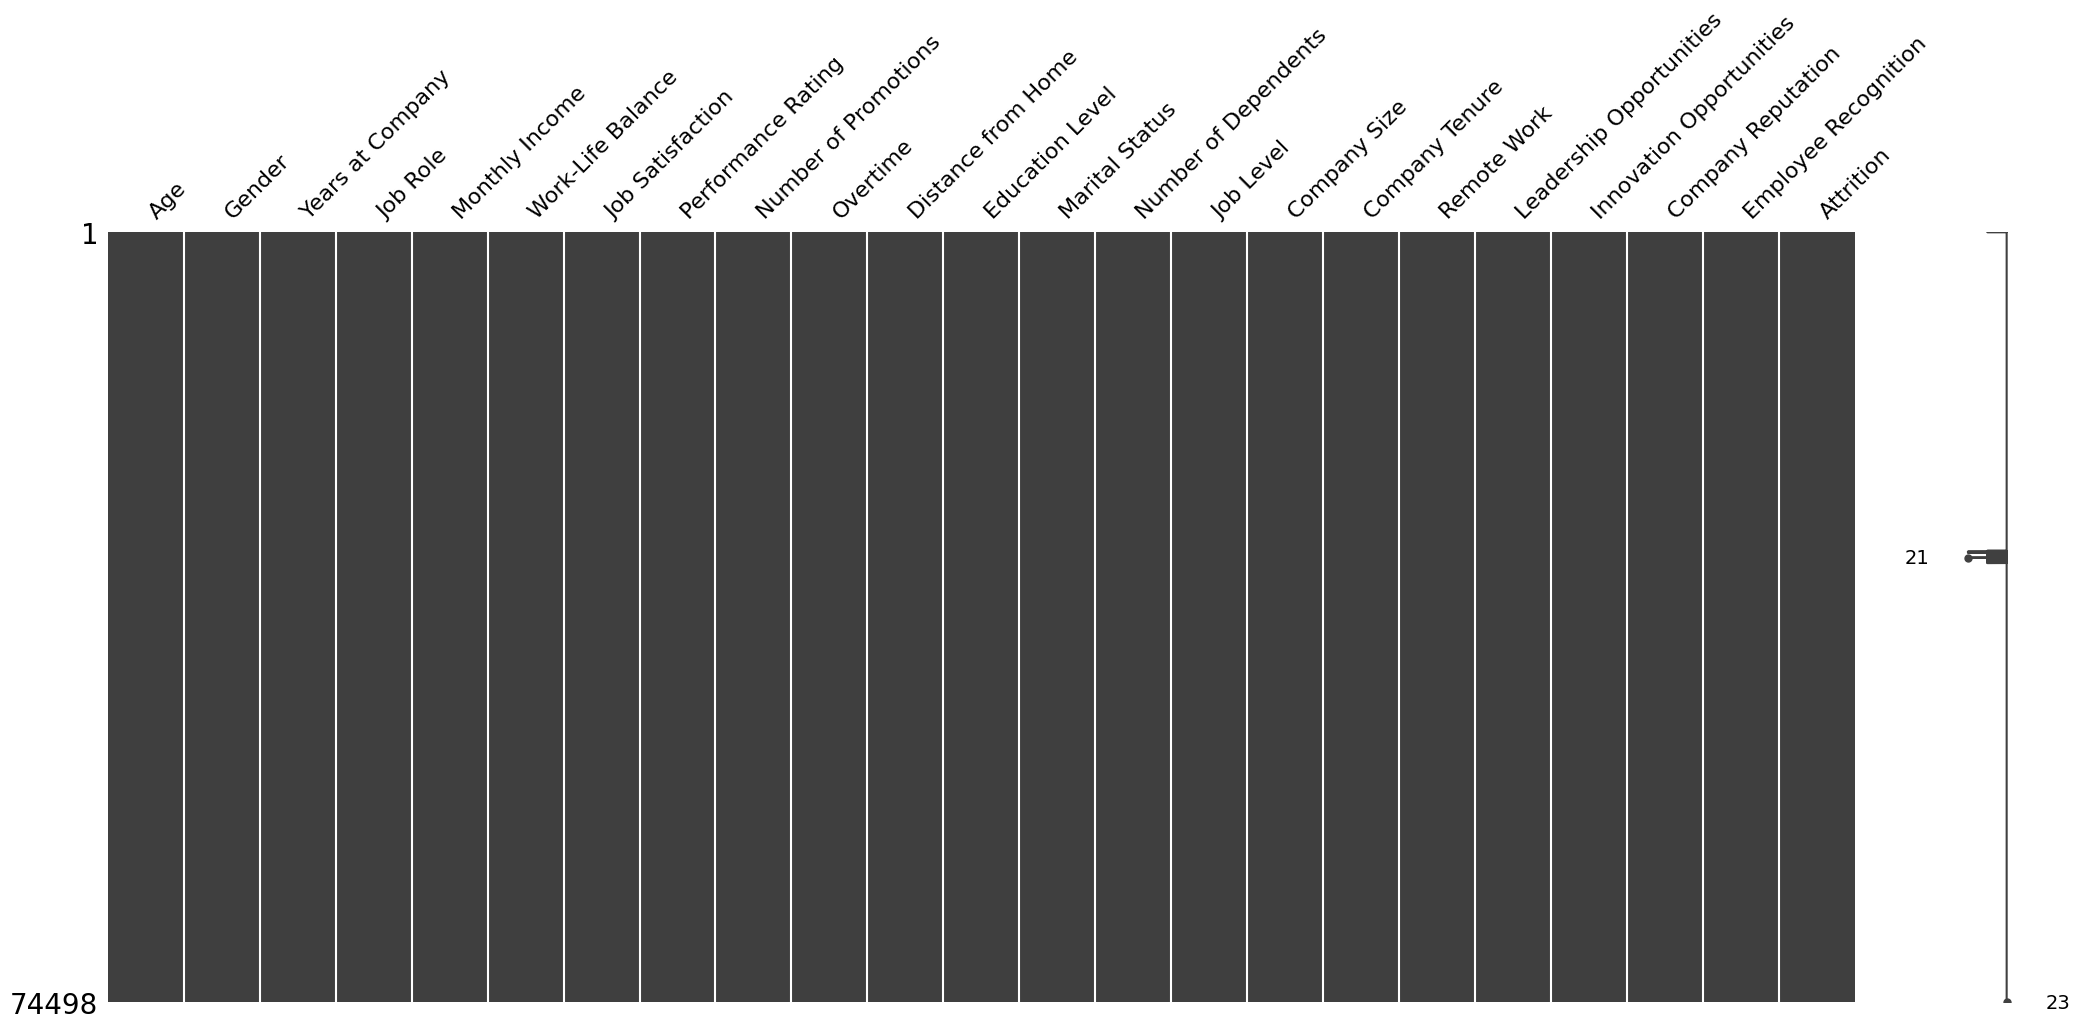

<Figure size 1500x900 with 0 Axes>

In [209]:
#missing values visualization
import missingno as msno
msno.matrix(data)
plt.figure(figsize=(15,9))
plt.show()

In [210]:
data.isna().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,4
Job Satisfaction,0
Performance Rating,4
Number of Promotions,5
Overtime,0


In [211]:
#Since there are very few missing values, the missing values are easy to handle

A.Handling missing values(Imputing method)



In [212]:
data.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

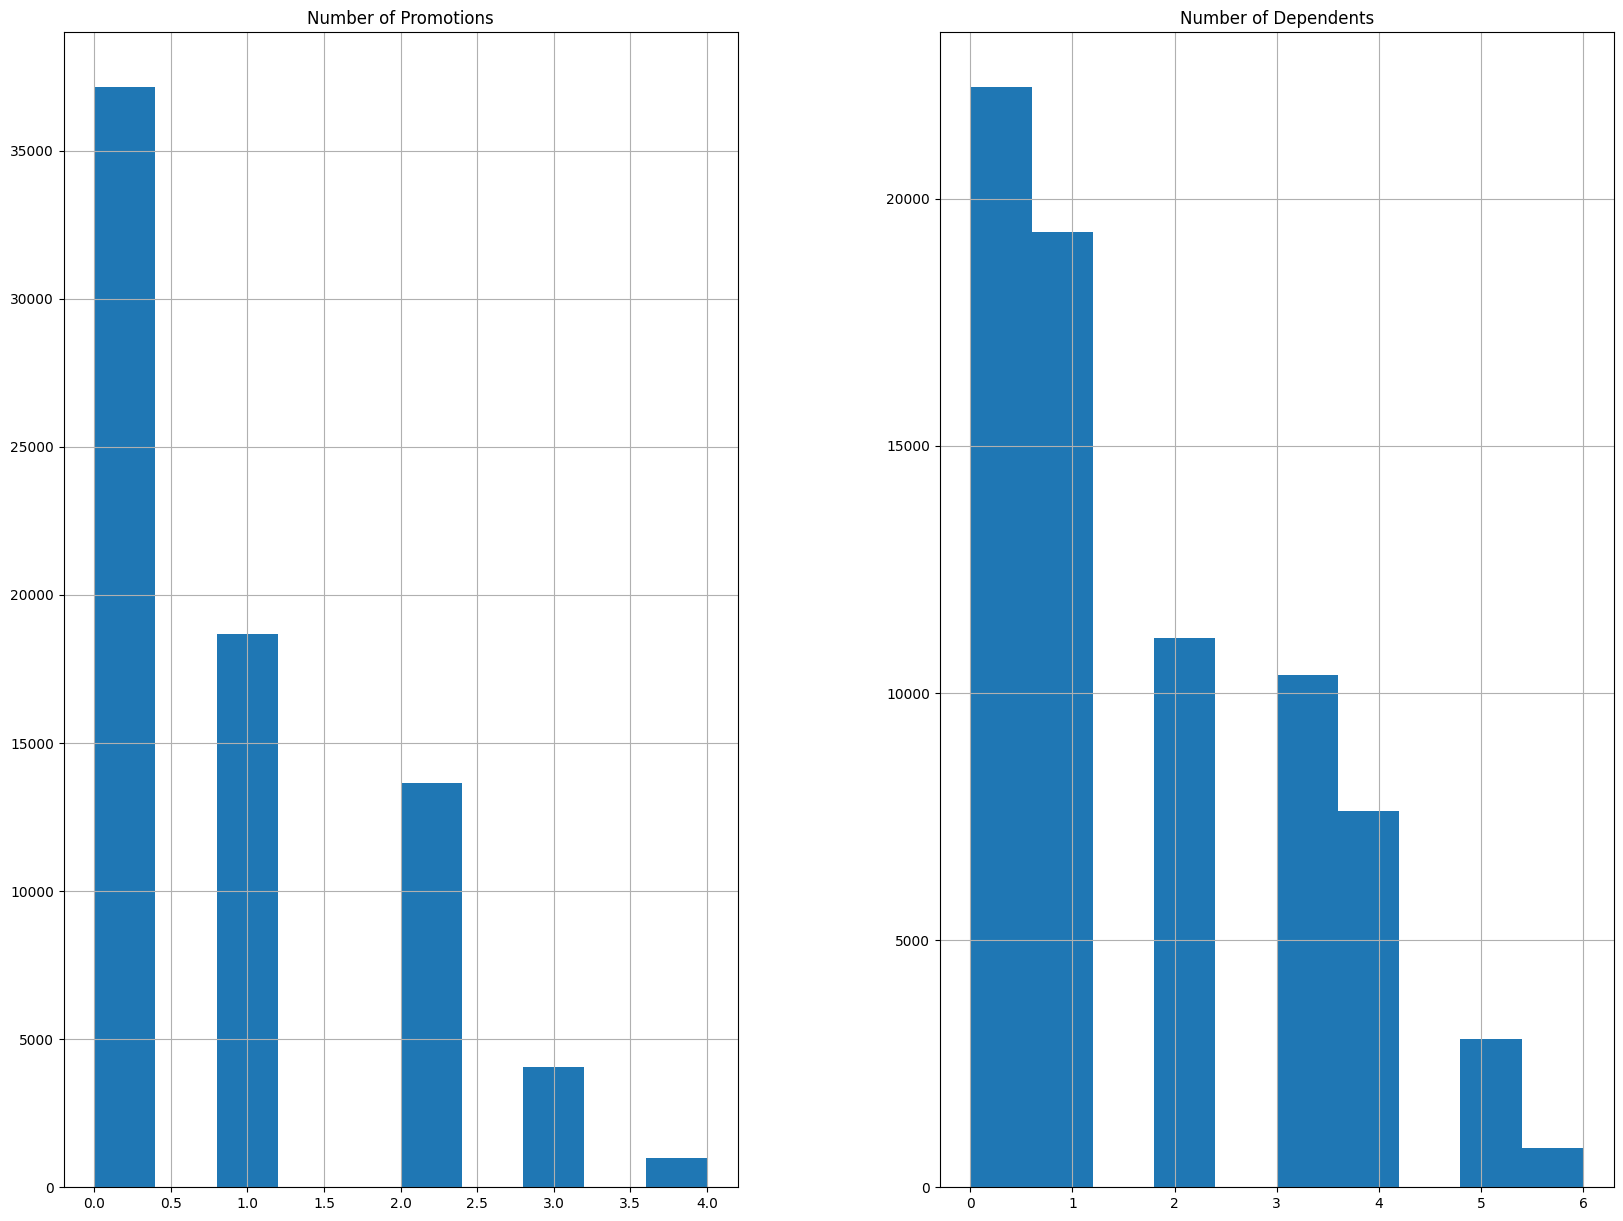

In [213]:
#imputing numerical columns('Number of Promotions','Number of Dependents')
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [214]:
#since both the features show skewed distribution,the missing values can be imputed using median.
for col in ['Number of Promotions','Number of Dependents']:
       data[col]=data[col].fillna(data[col].median())

In [215]:
#Imputing categorical columns using median
for col in [ 'Work-Life Balance', 'Performance Rating', 'Number of Promotions','Education Level', 'Marital Status',
             'Remote Work','Job Level', 'Company Size','Employee Recognition']:
       data[col]=data[col].fillna(data[col].mode()[0])

In [216]:
#verifying the missing columns
data.isna().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0
Overtime,0


**4.EDA**

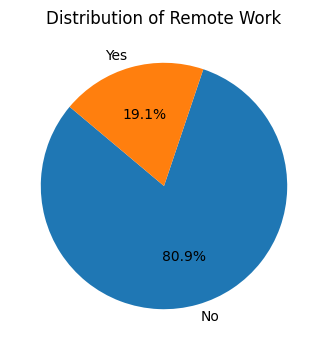

In [217]:
#visualizing the categorical columns with values 'yes' or 'no'
Remotework_count = data['Remote Work'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Remotework_count, labels=Remotework_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Remote Work')
plt.show()

In [218]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


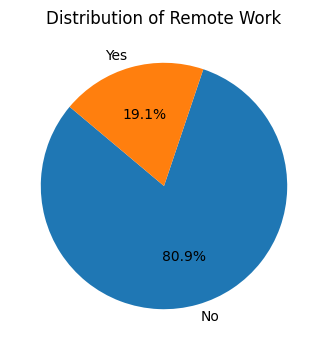

In [219]:
Remotework_count = data['Remote Work'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Remotework_count, labels=Remotework_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Remote Work')
plt.show()

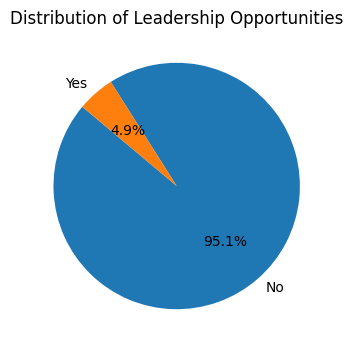

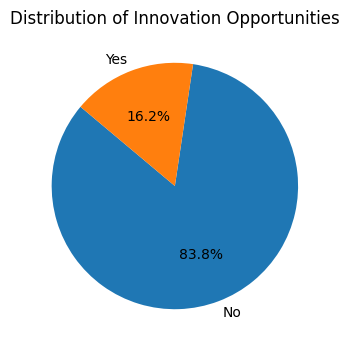

In [220]:
Leadership_count = data['Leadership Opportunities'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Leadership_count, labels=Remotework_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Leadership Opportunities')
plt.show()

Innovation_count = data['Innovation Opportunities'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Innovation_count, labels=Remotework_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Innovation Opportunities')
plt.show()

All of these columns have relevant disribution of values. So it is not needed to drop the columns.

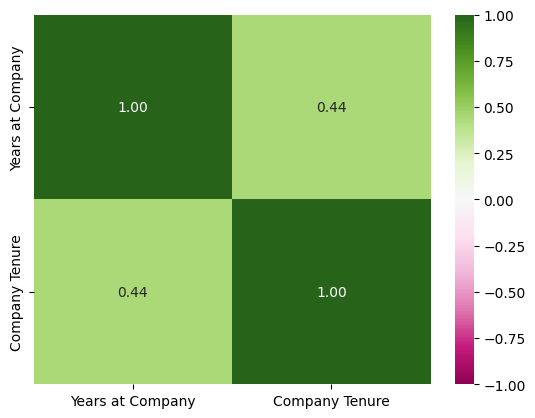

In [221]:
# 1. Target variable against other numerical variables
cor = data[['Years at Company','Company Tenure']].corr()
sns.heatmap(cor, annot = True, cmap = 'PiYG' , fmt = '0.2f', vmin = '-1')
plt.show()

Since there is no much correlation between both features even though the terms seem similar, both features are going to keep.

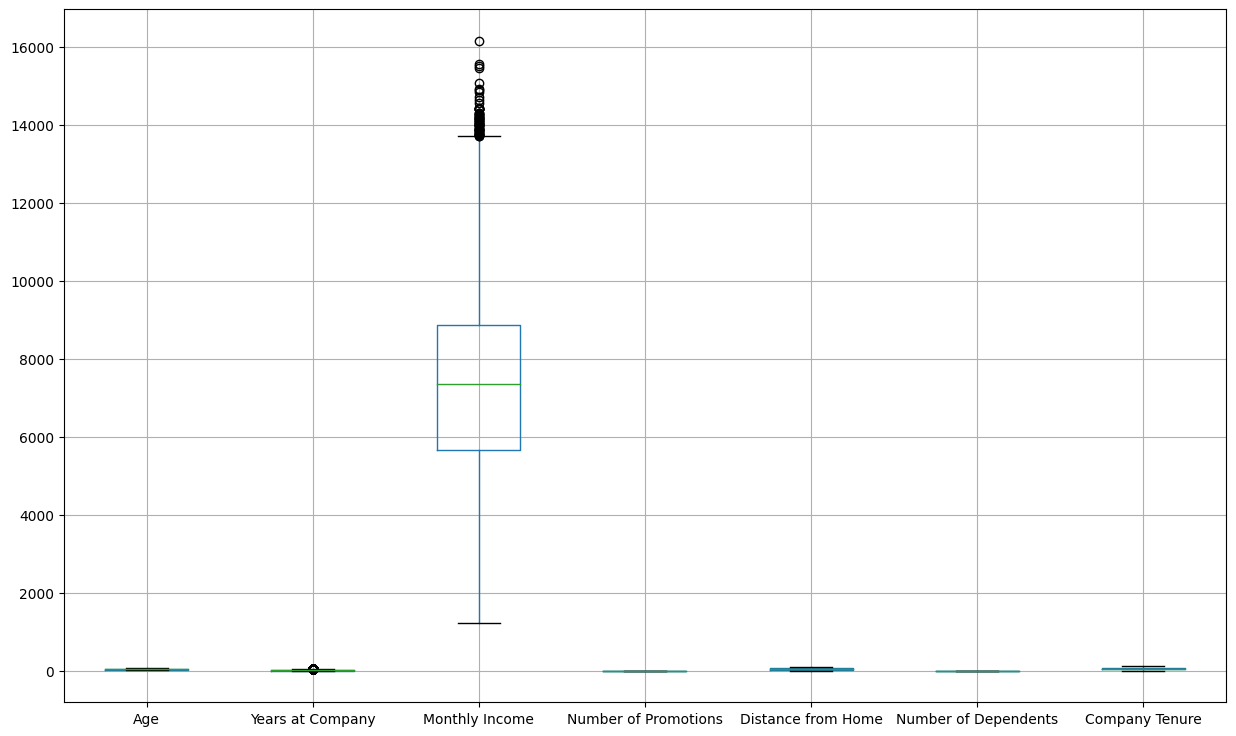

In [222]:
#Checking Outliers
data.boxplot(figsize=(15,9))
plt.show()

In [223]:
#Handling outliers in Monthly Income column using IQR
q1=data['Monthly Income'].quantile(0.25)
q2=data['Monthly Income'].quantile(0.5)
q3=data['Monthly Income'].quantile(0.75)

In [224]:
print(q1,q2,q3)

5652.0 7348.0 8876.0


In [225]:
iqr=q3-q1
LL=q1-(1.5*iqr)
UL=q3+(1.5*iqr)

In [226]:
outlier=data[(data['Monthly Income']<LL)|(data['Monthly Income']>UL)].index

In [227]:
data.drop(outlier, inplace=True)

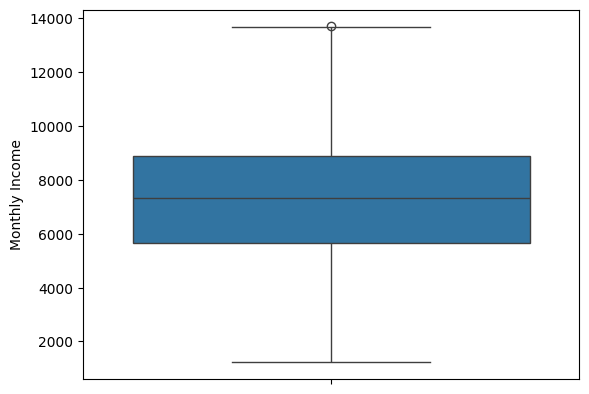

In [228]:
sns.boxplot(y=data['Monthly Income'])
plt.show()

**5.Encoding**

In [229]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [230]:
data.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [231]:
data.dtypes


,0
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64
Overtime,object


In [232]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Job Role']=le.fit_transform(data['Job Role'])
data['Work-Life Balance']=le.fit_transform(data['Work-Life Balance'])
data['Job Satisfaction']=le.fit_transform(data['Job Satisfaction'])
data['Performance Rating']=le.fit_transform(data['Performance Rating'])
data['Overtime']=le.fit_transform(data['Overtime'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Job Level']=le.fit_transform(data['Job Level'])
data['Company Size']=le.fit_transform(data['Company Size'])
data['Remote Work']=le.fit_transform(data['Remote Work'])
data['Leadership Opportunities']=le.fit_transform(data['Leadership Opportunities'])
data['Innovation Opportunities']=le.fit_transform(data['Innovation Opportunities'])
data['Company Reputation']=le.fit_transform(data['Company Reputation'])
data['Employee Recognition']=le.fit_transform(data['Employee Recognition'])
data['Attrition']=le.fit_transform(data['Attrition'])

In [233]:
#One hot Encoding
data1=data[['Education Level']]

In [234]:
data1 = pd.get_dummies(data1)
data1 = data1.astype(int)
data1.head()

,Education Level_Associate Degree,Education Level_Bachelor’s Degree,Education Level_High School,Education Level_Master’s Degree,Education Level_PhD
0,1,0,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [235]:
#dropping the column 'Education Level' from original dataset
data.drop(columns=['Education Level'],inplace=True)

In [236]:
#concating the encoded columns with the original dataset
data=pd.concat([data,data1],axis=1)

In [237]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Education Level_Associate Degree,Education Level_Bachelor’s Degree,Education Level_High School,Education Level_Master’s Degree,Education Level_PhD
0,31,1,19,0,5390,0,2,0,2.0,0,...,0,0,0,2,1,1,0,0,0,0
1,59,0,4,3,5534,3,0,3,3.0,0,...,0,0,1,1,1,0,0,0,1,0
2,24,0,10,2,8159,2,0,3,0.0,0,...,0,0,3,1,1,0,1,0,0,0
3,36,0,7,0,3989,2,0,2,1.0,0,...,0,0,2,2,1,0,0,1,0,0
4,56,1,41,0,4821,1,3,0,0.0,1,...,0,0,1,2,1,0,0,1,0,0


In [238]:
data.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition', 'Education Level_Associate Degree',
       'Education Level_Bachelor’s Degree', 'Education Level_High School',
       'Education Level_Master’s Degree', 'Education Level_PhD'],
      dtype='object')

In [239]:
#verifying the datatypes of the dataset
data.dtypes

,0
Age,int64
Gender,int64
Years at Company,int64
Job Role,int64
Monthly Income,int64
Work-Life Balance,int64
Job Satisfaction,int64
Performance Rating,int64
Number of Promotions,float64
Overtime,int64


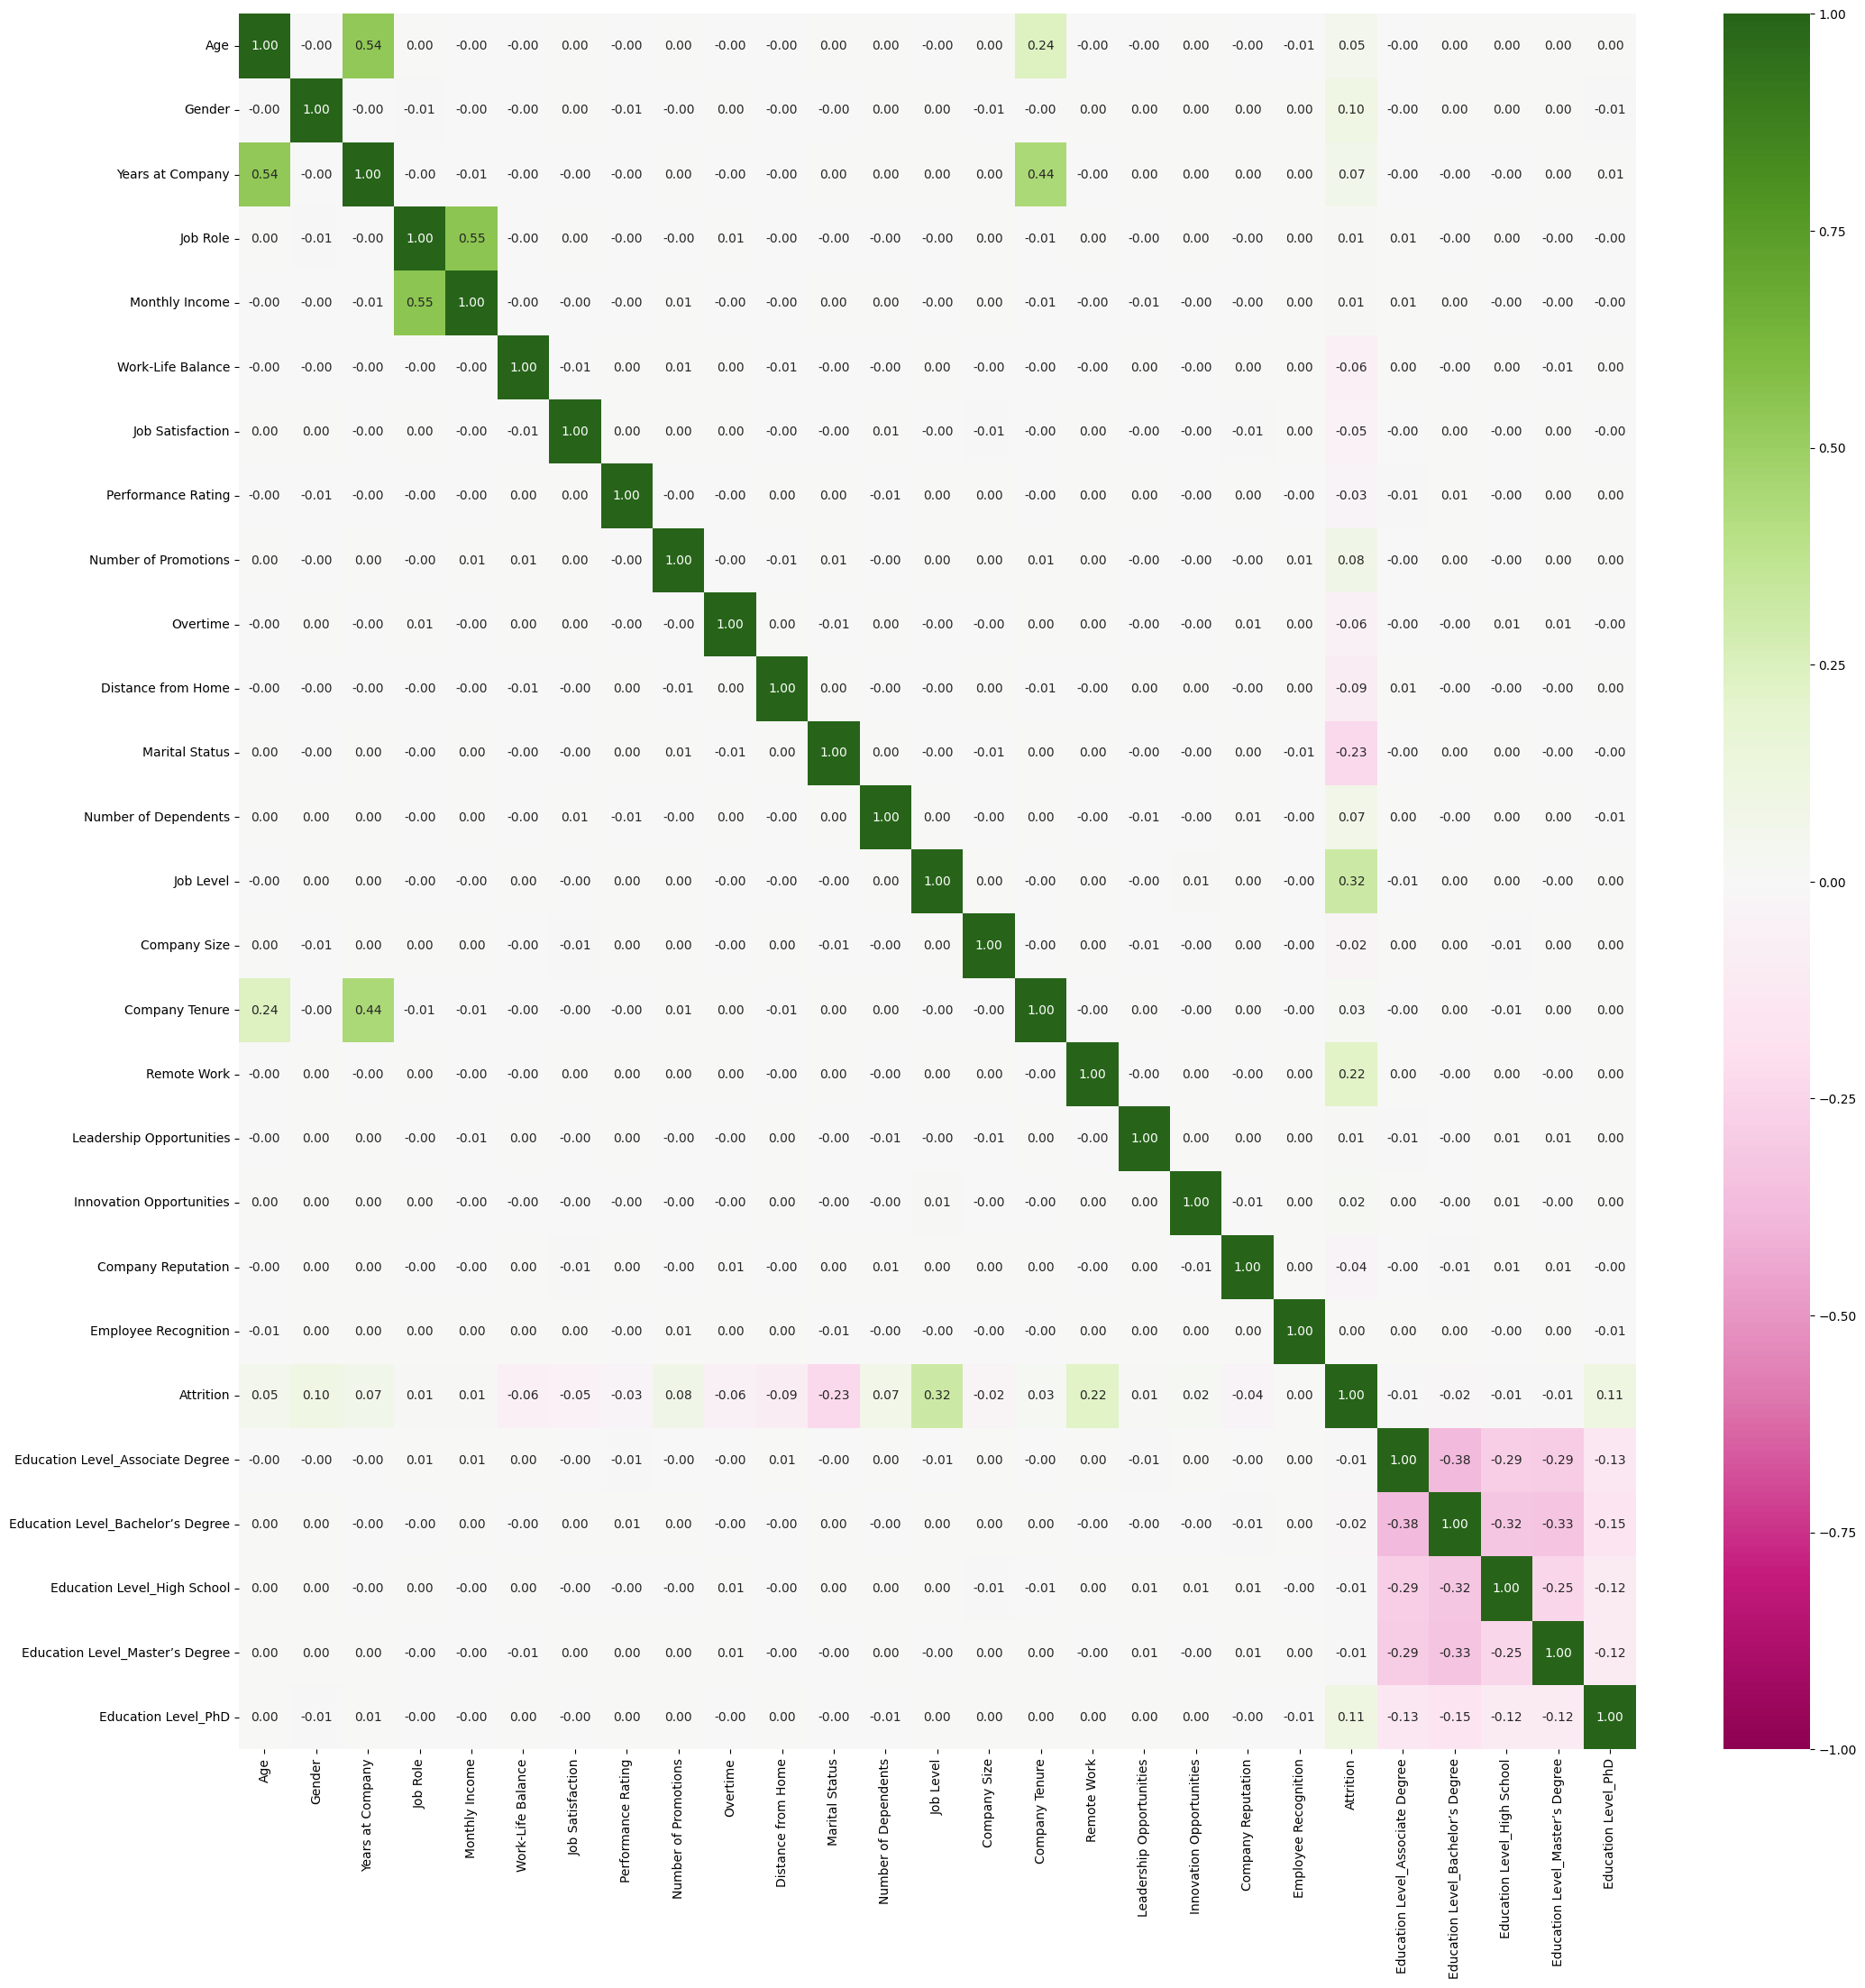

In [240]:
# Visualizing correlation among the features
plt.figure(figsize=(25,25))
sns.heatmap(data.corr() , annot = True, vmin = '-1' , cmap = 'PiYG', fmt = '0.2f')
plt.show()

**6.Train Test Split**

In [200]:
#checking the class imbalance
data['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
1,0.525251
0,0.474749


In [241]:
#Splitting the Features and target variable
X = data.drop('Attrition' , axis = 1)
y = data['Attrition']

In [242]:
#Importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standard Scaler

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[7430 3178]
 [3197 8525]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     10608
           1       0.73      0.73      0.73     11722

    accuracy                           0.71     22330
   macro avg       0.71      0.71      0.71     22330
weighted avg       0.71      0.71      0.71     22330


Accuracy Score: 0.7145096283027318


Random Forest Classifier

In [245]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [246]:
y_pred=rf_clf1.predict(X_test)

In [247]:
print('Accuracy is= ',accuracy_score(y_test,y_pred))

Accuracy is=  0.729511867442902


In [248]:
#hypertuning
rf_clf2=RandomForestClassifier(n_estimators=1000,max_depth=20,criterion='entropy',min_samples_split=3)          #now try with 1000 trees
rf_clf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=1000)

In [249]:
y_pred=rf_clf2.predict(X_test)

In [250]:
print('Accuracy is= ',accuracy_score(y_test,y_pred))

Accuracy is=  0.7446036721898791


Gradient Boosting Classifier

In [251]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7538
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     10608
           1       0.77      0.77      0.77     11722

    accuracy                           0.75     22330
   macro avg       0.75      0.75      0.75     22330
weighted avg       0.75      0.75      0.75     22330



In [252]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [259]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 2 , 3]
}



In [260]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=2)

In [262]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [5],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [100],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [263]:
print("Best Parameters:\n",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Best Parameters:
 {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.7580177096999433


In [264]:
best_model = grid_search.best_estimator_

In [265]:
y_pred = best_model.predict(X_test)

In [266]:
print("\nAccuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))



Accuracy Score: 0.7552619793999105
Confusion Matrix:
 [[7923 2685]
 [2780 8942]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74     10608
           1       0.77      0.76      0.77     11722

    accuracy                           0.76     22330
   macro avg       0.75      0.75      0.75     22330
weighted avg       0.76      0.76      0.76     22330



Here model gave the accuracy of 0.758 using the Grid Search Cross-Validation (CV) with an XGBoost Classifier.Therefore the best method is Grid Search CV with an XGBoost Classifier in comparison to other models used like, logistic regression Gradient boosting classifier.